In [1]:
## We import all the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
## We read our data info

data_info = pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')

In [3]:
## We define a function to return the description of each feature

def feat_info(x):
    print(data_info.loc[x]['Description'])

In [4]:
## We test if the function is working fine

feat_info('mort_acc')

Number of mortgage accounts.


In [5]:
## We read our data into a dataframe

df = pd.read_csv('lending_club_loan_two.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
## We check our numeric data

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


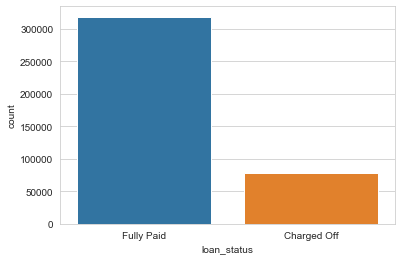

In [7]:
## We now start exploring our label column

sns.countplot('loan_status', data = df)
plt.show()

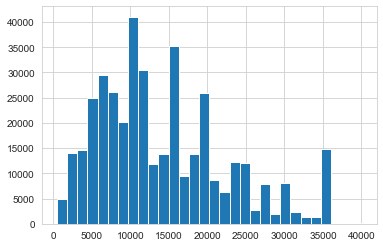

In [8]:
## We see how the amount of loans are distributed

df['loan_amnt'].hist(bins = 30)
plt.show()

In [9]:
## We check for collinearity in our dataset. 

df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


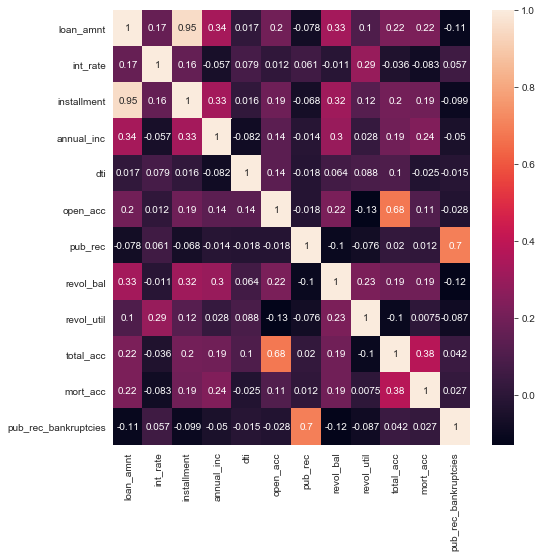

<Figure size 432x288 with 0 Axes>

In [10]:
## We create a heatmap to visualize the correlations 

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()
plt.tight_layout()

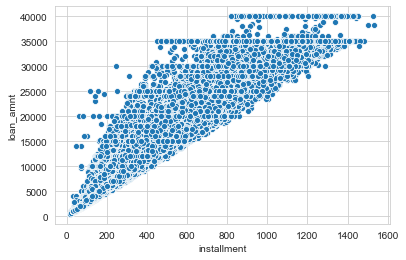

In [11]:
## We see that installments and loan amount have a linear relationship. This is what we would epect to be.

sns.scatterplot('installment', 'loan_amnt', data = df)
plt.show()

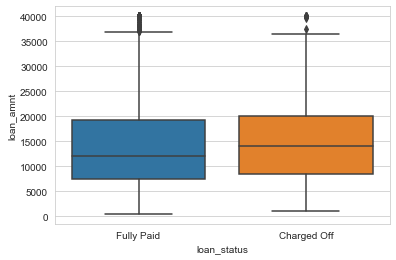

In [12]:
## We see that loan amount has not much impact on if the loan was paid or charged off.

sns.boxplot('loan_status', 'loan_amnt', data = df)
plt.show()

In [13]:
## We see the distribution of our label

df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [14]:
## We see unique values of grade 

df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

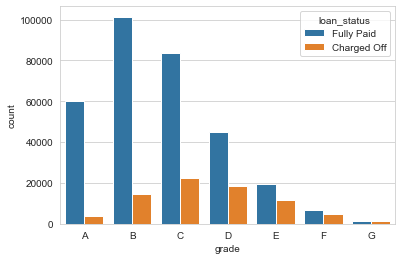

In [15]:
## We plot our grades and see how labels are distributed among each grade.

sns.countplot('grade', data = df, hue = 'loan_status', order = sorted(df['grade'].unique()))
plt.show()

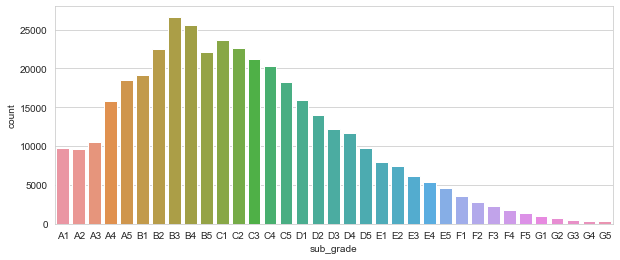

In [16]:
## We see how subgrades are distributed

plt.figure(figsize = (10,4))
sns.countplot('sub_grade', data = df, order = sorted(df['sub_grade'].unique()))
plt.show()

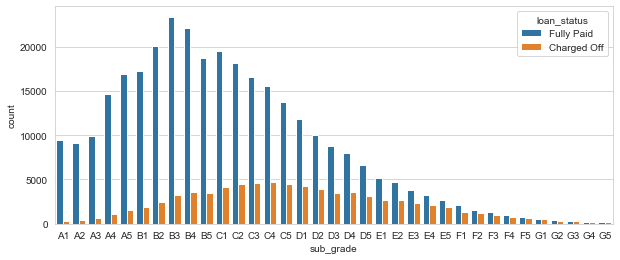

In [17]:
## We now see how labels are distributed among each sub grade.

plt.figure(figsize = (10,4))
sns.countplot('sub_grade', data = df, order = sorted(df['sub_grade'].unique()), hue = 'loan_status')
plt.show()

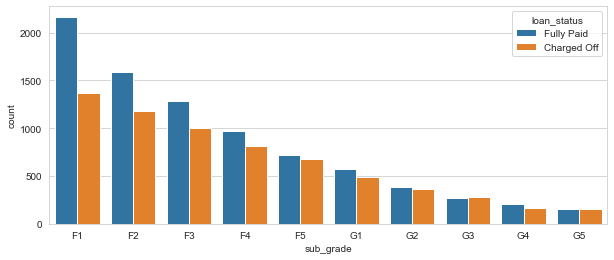

In [18]:
## We now check them for subgrades F and G

plt.figure(figsize = (10,4))
sns.countplot('sub_grade', data = df[(df['grade'] == 'F') | (df['grade'] == 'G')], hue = 'loan_status', order = sorted(df[(df['grade'] == 'F') | (df['grade'] == 'G')]['sub_grade'].unique()))
plt.show()

In [19]:
## Now we define fully paid as 1 and charged off as 0.

df['loan_status'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

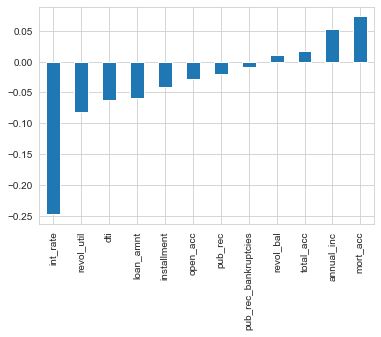

In [20]:
## Now we check for correlations with our target variable.

df.corr()['loan_status'].sort_values().drop('loan_status').plot(kind = 'bar')
plt.show()

In [21]:
## We check if there are any null values

df.columns[df.isnull().any()]

Index(['emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [22]:
## We check for missing values as a percentage.

df.isnull().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [23]:
## We see that emp_title has a lot of unique values

df['emp_title'].nunique()

173105

In [24]:
## Therefore we drop it

df.drop('emp_title', axis = 1, inplace = True)

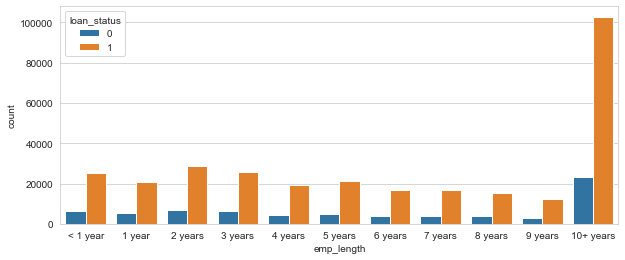

In [25]:
## Now we plot for emp_length according to our label

plt.figure(figsize = (10,4))
sns.countplot('emp_length', data = df,hue = 'loan_status', order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'])
plt.show()


In [26]:
## Now we see the employee lengths for people who didnt pay their loan.

emp = df[df['loan_status'] == 0].groupby('emp_length').count()['loan_status'] / df.groupby('emp_length').count()['loan_status']

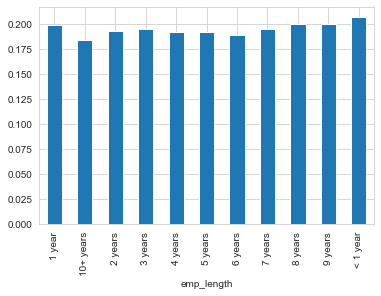

In [27]:
emp.plot(kind = 'bar')
plt.show()

In [28]:
## It doesnt add much value since all look the same. We thus drop the emp_length column.

df.drop('emp_length', axis = 1, inplace=True)

In [29]:
## Now we check our title column

df['title'].nunique()

48817

In [30]:
## We see that purpose and title have the same meaning.

feat_info('purpose')
print('/n')
feat_info('title')

A category provided by the borrower for the loan request. 
/n
The loan title provided by the borrower


In [31]:
## Thus to reduce redundancy, we drop title column

df.drop('title', axis = 1, inplace=True)

In [32]:
## Now we check for null values again

df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [33]:
## Now we fill missing values for mort_acc column.

df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [34]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_status             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [35]:
tot = df.groupby('total_acc').mean()['mort_acc']

In [36]:
def fun(x,y):
    if np.isnan(y):
        return tot[x]
    else:
        return x

In [37]:
df['mort_acc'] = df.apply(lambda x: fun(x['total_acc'], x['mort_acc']), axis = 1)

In [38]:
## We check the null values again

df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [39]:
## We now drop the rows with missing values.

df.dropna(inplace = True)

In [40]:
## Now we see that we have no missing values

df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [41]:
## We now make a stcol with all the object columns

stcol = []
for i in df.columns:
    if df[i].dtype == 'object':
        stcol.append(i)
stcol

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [42]:
## We see that we have loans with a 3 year or 5 year term

df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [43]:
## We edit the text from this column because we just need the numeric month number

df['term'] = df['term'].apply(lambda x: x[:3])

In [44]:
## We drop the grade column as the information is redundant in sub-grade column.

df.drop('grade', axis = 1, inplace = True)

In [45]:
## Let us now check our dataframe

df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,1,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,25.000000,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,1,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,27.000000,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,1,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,26.000000,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,1,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,13.000000,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,43.000000,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,1,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,23.000000,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,1,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,8.000000,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,1,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,23.000000,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,1,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,20.000000,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [46]:
## We now do one-hot-encoding by creating dummies for sub-grade variables

sub_dummies = pd.get_dummies(df['sub_grade'], drop_first = True)
df = pd.concat([df,sub_dummies],axis=1)
df.drop("sub_grade", axis=1, inplace=True)

In [47]:
## We see all the object columns

df.select_dtypes(['object']).columns

Index(['term', 'home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [48]:
## We now create dummies for other object variables 

ver_dummies = pd.get_dummies(df['verification_status'], drop_first = True)
df = pd.concat([df,ver_dummies],axis=1)
df.drop("verification_status", axis=1, inplace=True)

app_dummies = pd.get_dummies(df['application_type'], drop_first = True)
df = pd.concat([df,app_dummies],axis=1)
df.drop("application_type", axis=1, inplace=True)

init_dummies = pd.get_dummies(df['initial_list_status'], drop_first = True)
df = pd.concat([df,init_dummies],axis=1)
df.drop("initial_list_status", axis=1, inplace=True)

purp_dummies = pd.get_dummies(df['purpose'], drop_first = True)
df = pd.concat([df,purp_dummies],axis=1)
df.drop("purpose", axis=1, inplace=True)

In [49]:
## We now check our object columns

df.select_dtypes(['object']).columns

Index(['term', 'home_ownership', 'issue_d', 'earliest_cr_line', 'address'], dtype='object')

In [50]:
## We define function to merge any or other category

def fn(x):
    if x == 'ANY' or x == 'NONE':
        return('OTHER')
    else:
        return(x)
    

In [51]:
## We apply our function for home_ownership feature.

df['home_ownership'] = df['home_ownership'].apply(lambda x: fn(x))

In [52]:
## We create dummies for this feature

home_dummies = pd.get_dummies(df['home_ownership'], drop_first = True)
df = pd.concat([df,home_dummies],axis=1)
df.drop("home_ownership", axis=1, inplace=True)

In [53]:
## We create a new column as zip codes

df['zip'] = df['address'].apply(lambda x: x[len(x)-5:])

In [54]:
df.drop('address', axis = 1, inplace = True)

In [55]:
## We create dummies for zip codes

zip_dummies = pd.get_dummies(df['zip'], drop_first = True)
df = pd.concat([df,zip_dummies],axis=1)
df.drop("zip", axis=1, inplace=True)

In [56]:
## We drop issue column

df.drop('issue_d', axis = 1, inplace = True)

In [57]:
## We want the year of earliest credit line. This feature can be found in earliest_cr_line column.

df['earliest_cr_line'][0][4:]

'1990'

In [58]:
## We crop this feature to extract years

df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[4:]))

In [59]:
## We now drop the unwanted column

df.drop('earliest_cr_line', axis = 1, inplace = True)

In [60]:
## Let us now finally check our data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   annual_inc            395219 non-null  float64
 5   loan_status           395219 non-null  int64  
 6   dti                   395219 non-null  float64
 7   open_acc              395219 non-null  float64
 8   pub_rec               395219 non-null  float64
 9   revol_bal             395219 non-null  float64
 10  revol_util            395219 non-null  float64
 11  total_acc             395219 non-null  float64
 12  mort_acc              395219 non-null  float64
 13  pub_rec_bankruptcies  395219 non-null  float64
 14  A2                    395219 non-null  uint8  
 15  

In [61]:
## We now choose a fraction of our sample to fir neural network to save time. 
## We should deploy the complete dataset in reality.

df2 = df.sample(frac=0.1,random_state=101)

In [62]:
## We split our data and take the arrays from them for tensorflow

from sklearn.model_selection import train_test_split
x = df2.drop('loan_status', axis = 1).values
y = df2['loan_status'].values


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 101)

In [64]:
## We scale our values to be between 0 to 1 because it gives beter results with relu

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [65]:
## We define our architecture with 78 inputs, 2 layers of 78 and 39 neurons and finally output of 1 neuron. 
## We choose adam optimizer because it performs well. 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(78 ,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(39 ,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(19 ,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')


In [66]:
## We now define earlystopping and start training our model

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x=x_train, 
          y=y_train, 
          epochs=100,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )


Train on 31617 samples, validate on 7905 samples
Epoch 1/100
31617/31617 [==============================] - 10s 330us/sample - loss: 0.3464 - val_loss: 0.2870
Epoch 2/100
31617/31617 [==============================] - 7s 236us/sample - loss: 0.2817 - val_loss: 0.2755
Epoch 3/100
31617/31617 [==============================] - 8s 244us/sample - loss: 0.2738 - val_loss: 0.2758
Epoch 4/100
31617/31617 [==============================] - 8s 250us/sample - loss: 0.2700 - val_loss: 0.2755
Epoch 5/100
31617/31617 [==============================] - 8s 257us/sample - loss: 0.2669 - val_loss: 0.2728
Epoch 6/100
31617/31617 [==============================] - 9s 271us/sample - loss: 0.2649 - val_loss: 0.2708
Epoch 7/100
31617/31617 [==============================] - 8s 266us/sample - loss: 0.2630 - val_loss: 0.2711
Epoch 8/100
31617/31617 [==============================] - 8s 262us/sample - loss: 0.2623 - val_loss: 0.2733
Epoch 9/100
31617/31617 [==============================] - 8s 253us/sample - l

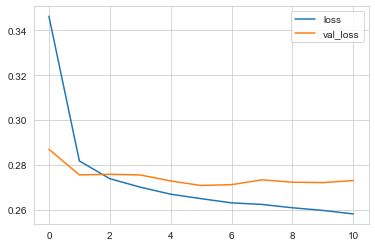

In [67]:
## We plot our model to see if it is what we desired. 
## Train and validation loss went down together as we expect it to be.

losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [68]:
## Now we generate the confusion matrix to evaluate our model performance.

from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.94      0.43      0.59      1570
           1       0.87      0.99      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.91      0.71      0.76      7905
weighted avg       0.89      0.88      0.86      7905



array([[ 671,  899],
       [  45, 6290]])